<img style="transform: ; width:1000px" src="IMDb_FeaturedImage.jpg" alt="imdb" title="Title text" />


>>>#                                   Investigate a The Movie Database (TMDb)


##                                     Project 2 - by Hanan AlTuwaijri




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Data Overview**: 
>
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue..
>
>    *It's cleaned from original data on Kaggle.
>
>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>● There are some odd characters in the ‘cast’ column.

>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

>
>
>    
>    
>**I will analysis this dataset to Find "the success of a movie" from two perspectives :**\
> 1- Commercial Success (What kinds of properties are associated with movies that have high profits?)\
  2- Popularity Success (What kinds of properties are associated with movies that have high Score?)
  
  
> And I will explore the data with this general Questions:
>  
>
>. Which genres are most popular from year to year?
>
>. Who is the actor/s with highest movie revenues?
>
>. Which company have the most movies productivity ?
>



In [1]:
#import the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#CSS = """
#.output {
#    flex-direction: row;
#}
#"""
#HTML('<style>{}</style>'.format(CSS))

<a id='wrangling'></a>
## Data Wrangling
<li><a href="#Assessing">Assessing Data</a></li> 
<li><a href="#Cleaning">Data Cleaning</a></li> 
</ul>

<a id='Assessing'></a>




### General Properties ( Assessing Data )

<ul>
<li><a href="#shape">Number of samples & columns in the dataset</a></li>
<li><a href="#Datatypes">Datatypes of the columns</a></li>
<li><a href="#Descriptive">Descriptive statistics for the dataset</a></li>
<li><a href="#missing">Features with missing values</a></li>
<li><a href="#zero">Features with zero values</a></li>  
<li><a href="#unique">Number of unique values for the dataset</a></li>
<li><a href="#Duplicate"> Duplicate rows in the dataset</a></li>
<li><a href="#rowsM">Number of rows with missing values in the dataset</a></li>

<li><a href="#Observations">Observations</a></li> 

</ul>


In [2]:
df=pd.read_csv('tmdb-movies.csv')
#I will leave this incase 
df1=pd.read_csv('tmdb-movies.csv')
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

<a id='shape'></a>

>.Number of samples and columns in the dataset : 10866 samples and 21 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='Datatypes'></a>

>.Datatypes of columns  :  release_date is not datatype, budget_adj and revenue_adj are float datatype 
 > | I will change datatypes in the data cleaning step

In [5]:
#Descriptive statistics for the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='Descriptive'></a>
Observation |
. the data from 1960 until 2015

. the maximun budget 425 hundred million$ \ maximun revenue over $2 billion. 

. Maximun voting Score (9.2)

. Zero values in the budget,revenue,runtime,budget_adj,revenue_ad
 
 >Action |  I will replace the zero values with the column mean-value to keep the analysis without noise 

In [6]:
#Features with missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='missing'></a>
>alot of missing values in this Features:
>imdb_id|cast|homepage|director|tagline|keywords|overview genres|production_companies|director  
>*I wil treat values of zero in the numeric reatures as missing also .

In [7]:
#Features with zero values
zero_values=df.loc[:, (df == 0).any()]
for i in zero_values.columns:
    zero_count = (zero_values[i] == 0).sum()
    print('`{}` have {} zero values'.format(i,zero_count))

`budget` have 5696 zero values
`revenue` have 6016 zero values
`runtime` have 31 zero values
`budget_adj` have 5696 zero values
`revenue_adj` have 6016 zero values


<a id='zero'></a>
>It is a huge amount of missing data for these columnes ,
>in order not to drop more than 50% of the data that will affect my statistics and visualization result, I decided to retain these rows and replace them with mean values.

In [8]:
#Number of unique values for the dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

<a id='unique'></a>
>To see the total number of unique values for each column:
> the id column have 1865 then its the dataset Key value .


In [9]:
#Duplicate rows in the dataset
df.duplicated().sum()

1

<a id='Duplicate'></a>
 >Only 1 duplicate row which i will drop next

In [10]:
#Number of rows with missing values in the dataset
df.isnull().any(axis=1).sum()

8874

<a id='rowsM'></a>
>8874 rows with missing value .

<a id='Observations'></a>
>Observations |\
> . the release_date type need to change. \
> . Some of the Features unimportant and need to drop.\
> . There are 5696 zero values rows in budget_adj, 6016 zero values row in revenue_adj It is a huge amount of missing data for these two columnes. In order not to drop more than 50% of the data that will affect my statistics and visualization result, I decided to retain these rows and replace them with mean values.

<a id='Cleaning'></a>
## Data Cleaning :

 <li><a href="#ColumnLabels">1-Cleaning Column Labels</a></li> 
  <li><a href="#drop">2- Drop Nulls, Dedupe</a></li> 
 <li><a href="#Inspecting"> 3-Inspecting Data Types</a></li> 

  <li><a href="#clean_new">  **Add any new features and check the Cleaned Data frame** </a></li> 



<a id='ColumnLabels'></a>
### 1-Cleaning Column Labels
 - Drop Extraneous Columns
 


In [11]:
# Drop Extraneous Columns
#Drop features that aren't relevant to our questions
df.drop(['id','imdb_id','homepage','tagline','keywords','overview'
       ,'budget','revenue'], axis=1, inplace=True )
# confirm changes
df.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


>**Drop Uniportant Columns**\
>Drop columns that aren't related to our questions. Coulmns i  droped :\
>id, imdb_id, homepage, tagline, keywords,overview.\
>budget and revenue will also be drop as I will be using the final two columns ending with “_adj” which show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

<a id='drop'></a>
### 2- Drop Nulls, Dedupe
 - Drop Duplicates Rows
 - Replce zero values with NaN then with mean

#### Drop Duplicates Rows

In [12]:
dupe=df.duplicated()
# drop duplicate rows
df.drop_duplicates(inplace=True)
# check number of duplicates -it should be 0
df.duplicated().sum()

0

> Now no  duplicate rows


#### Replce zero values with NaN then with mean

In [13]:
# creeate a list columns with zero values.
col_with_zero = ['runtime','budget_adj','revenue_adj']

# replace zero values with NaN for columns in the list.
df[col_with_zero] = df[col_with_zero].replace(0,np.NAN)

# confirme the changes
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Now I can replace them with mean values in the next section.

In [14]:
# fill NaN values with mean
df['runtime'].fillna(df['runtime'].mean(),inplace = True)
df['budget_adj'].fillna(df['budget_adj'].mean(),inplace = True)
df['revenue_adj'].fillna(df['revenue_adj'].mean(),inplace = True)

> Now no zero values in the budget_adj and revenue_adj and runtime

<a id='Inspecting'></a>
### 3-Inspecting Data Types
 -Convert release_date column to Date datatype.\
 -Convert budget and revenue  column to int datatype.



In [15]:
#Converte'release_date' to date format 
df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
# Columns to convert datatype of
columns = ['budget_adj', 'revenue_adj']
# Convert budget and revenue column to int datatype
df[columns] = df[columns].applymap(np.int64)
# Lets look at the new datatype
df.dtypes


popularity              float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj                int64
revenue_adj               int64
dtype: object

> The release_date column have the right data type

In [16]:
# Add new feature the profit each movie 

df['profit']=df['revenue_adj']-df['budget_adj']

df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,210161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,170419070
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1210948878


<a id='clean_new'></a>

In [17]:
# Store rows and columns using shape function.
rows, col = df.shape
#since rows includes count of a header, we need to remove its count.
print('We have {} total rows and {} columns.'.format(rows-1, col))

We have 10864 total rows and 14 columns.


<a id='clean_new'></a> 
>The profit column added its valuabale featrue to our analysis

In [18]:
df.to_csv('cleaned_tmdb.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that after trimmed and cleaned the data, you're ready to move on to exploration:\
-Compute statistics  
-Create visualizations  
**With the goal of addressing the research questions that I posed in the Introduction section**
> <li><a href="#q1">Question 1 ( What kinds of properties are associated with movies that have high profits?!)</a></li> 
>  <li><a href="#q2">Question 2  (What kinds of properties are associated with movies that have high Score?!)</a></li> 
>



In [19]:
# I willl work with the clean data frame
df=pd.read_csv('cleaned_tmdb.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   cast                  10789 non-null  object 
 3   director              10821 non-null  object 
 4   runtime               10865 non-null  float64
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   release_date          10865 non-null  object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  int64  
 12  revenue_adj           10865 non-null  int64  
 13  profit                10865 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


In [95]:
df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())

<a id='q1'></a>
### Research Question 1 ( What kinds of properties are associated with movies that have high profits?!)

>Which movie had the highest and lowest profit?

In [20]:

lowest=df['profit'].idxmin()
highest=df['profit'].idxmax()
highest_details = pd.DataFrame(df.loc[highest])
lowest_details = pd.DataFrame(df.loc[lowest])
display(highest_details)
display(lowest_details)


,1329
popularity,12.0379
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,George Lucas
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,1977-03-20
vote_count,4428
vote_average,7.9


,2243
popularity,0.25054
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.
release_date,2010-12-02
vote_count,74
vote_average,6.4


> From resualt above Star Wars movie have the highest profit by 2.75 Billion dollars.
and The Warrior's Way movie have the highest loss around 413 Billion dollars  .

>In order to analyze on the properties that are associated with movies that have high profit, I will filter the dataset to movies that made profit of more than the average profits .

In [130]:
#ُThe value that we will divide data Depending on it


df.profit.mean()

78211818.19530603

In [21]:

# all the movies with profits greater than the mean(78211818.19530603) 
High_profit=df.query('profit > profit.mean()')
High_profit.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,210161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,170419070
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,1210948878


 >create new dataframe by filter to movies that made profit of more than mean profits 
 - Now we will deal with this specific data 

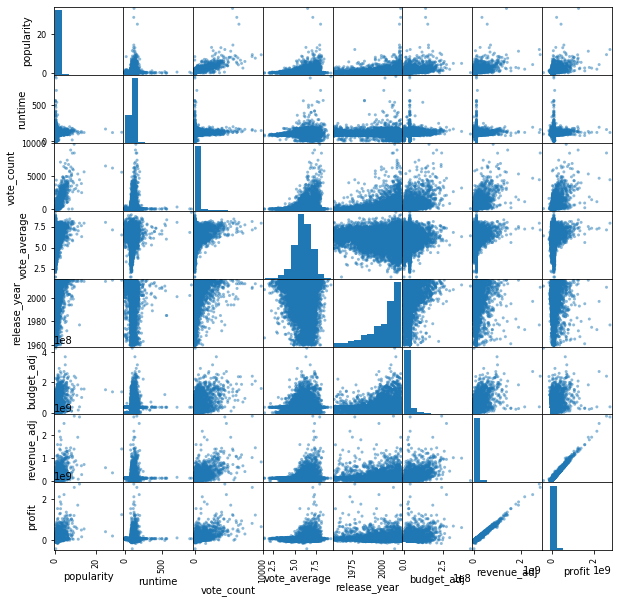

In [76]:
#Explore Relations Between Values¶

pd.plotting.scatter_matrix(df,figsize=(10,10));

In [77]:
Hp=High_profit['profit'].corr(df['popularity'])
Hr=High_profit['profit'].corr(df['runtime'])
Hv=High_profit['profit'].corr(df['vote_average'])
Hb=High_profit['profit'].corr(df['budget_adj'])
print('the relation between profit and other values to know which values have the most impact on profit: '
      '\n popularity : {}' '\n runtime : {}' '\n vote_average : {}' '\n budget_adj : {}'' .'.format(Hp,Hr,Hv,Hb))

the relation between profit and other values to know which values have the most impact on profit: 
 popularity : 0.5145878483131591
 runtime : 0.2369173364369937
 vote_average : 0.3084112686280852
 budget_adj : 0.46911992235750216 .


>There is a strong correlation between profit and popularity and budget_adj , mediam correlation with runtime and vote_average .

In [96]:
High_profit.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2.421000e+03,2.421000e+03,2.421000e+03
mean,1.223623,107.457700,592.786452,6.053697,2000.266006,4.080258e+07,2.319849e+08,1.911823e+08
std,1.753380,26.735167,1046.769596,0.966561,13.196586,4.976538e+07,2.326270e+08,2.050917e+08
min,0.001349,4.000000,10.000000,1.500000,1960.000000,0.000000e+00,8.361457e+07,7.822307e+07
25%,0.318495,92.000000,26.000000,5.500000,1993.000000,6.098402e+06,1.151009e+08,1.045842e+08
50%,0.658866,102.000000,139.000000,6.100000,2004.000000,2.180000e+07,1.151009e+08,1.136462e+08
75%,1.525009,119.000000,677.000000,6.700000,2011.000000,5.689693e+07,2.530897e+08,1.844223e+08
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


>From 10,865 movies, we are now down with only 2,421 movies which have profit higher than the average\
. The highest earning movie is 2.75 Billion dollars.

#### - High profit movie average popularity?

In [80]:
#the average popularity of the movies
High_profit['popularity'].mean()

1.2236230268484056

>Based on the above, the average popularity for high profit movies is 1.223 million. Let's use visualization to see the distribution of the popularity.

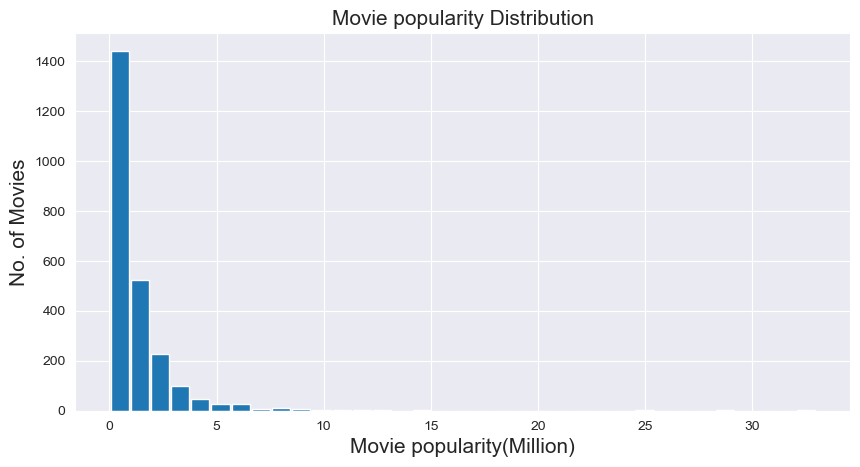

In [81]:
# create histogram to see the distribution of the popularity 
plt.figure(figsize=(10,5), dpi = 100)
sns.set_style('darkgrid')
# x-axis 
plt.xlabel('Movie popularity(Million)', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# distribution title
plt.title('Movie popularity Distribution', fontsize=15)

# Plot the histogram
plt.hist(High_profit['popularity'], rwidth = 0.9, bins =35)
# Displays the plot
plt.show()

>Alot of high profit movies have low popularity 

#### High profit movies average properties ?


In [92]:

mp=High_profit['popularity'].mean()
mr=High_profit['runtime'].mean()
mv=High_profit['vote_average'].mean()
mb=High_profit['revenue_adj'].mean()
md=High_profit['budget_adj'].mean()
print('High profit movies averages: '
      '\n popularity : {}' '\n runtime : {}' '\n vote_average : {}' '\n revenue_adj : {}' '\n budget_adj : {}'' .'.format(mp,mr,mv,mb,md))

High profit movies averages: 
 popularity : 1.2236230268484056
 runtime : 107.45769994365803
 vote_average : 6.053696819496078
 revenue_adj : 231984910.29822388
 budget_adj : 40802582.53118546 .


>**Based on the above,**

 >the average budget for high revenue movies is around 4 Million dollars($ 40,803,582)
 >
 
 >the average revenue for high revenue movies is around 231 Million dollars ($231984910) 


#### Which year that makes the highest profit ?


In [93]:
# release year have highest profit
highest_profit_year = High_profit.groupby('release_year')['profit'].sum()
highest_profit_year.idxmax()

2013

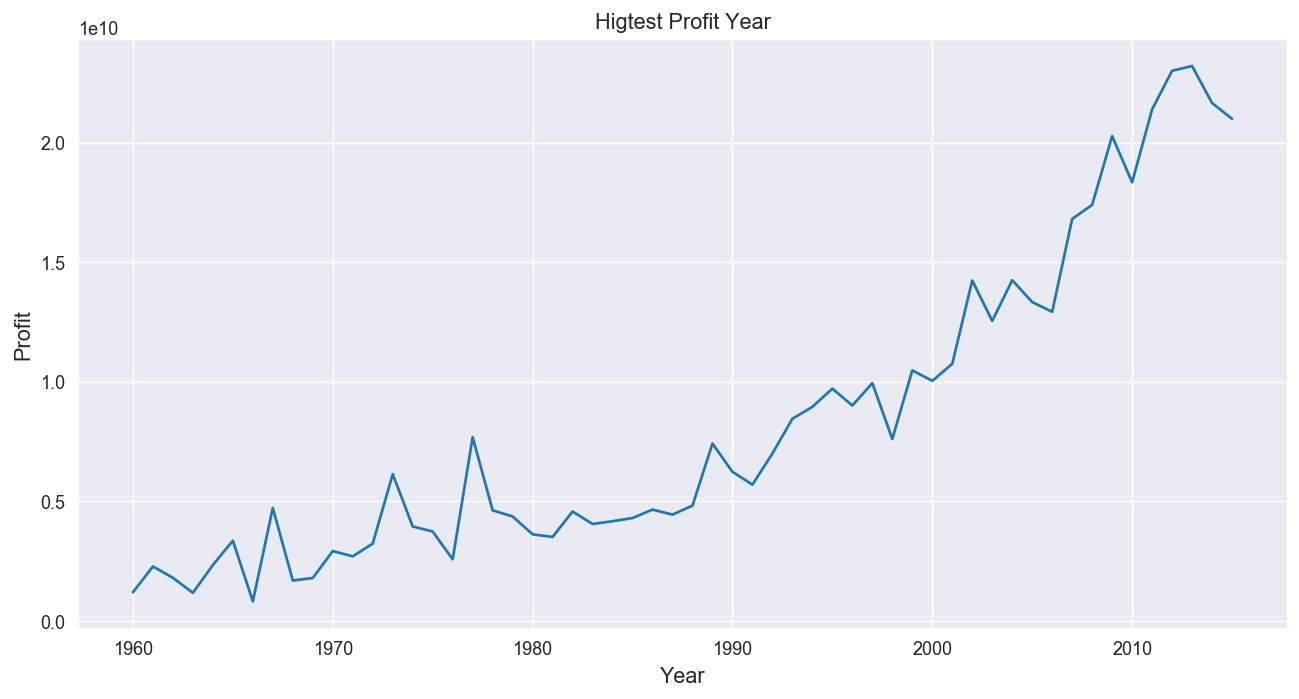

In [94]:
# Figure size
plt.figure(figsize=(12,6), dpi = 130)
sns.set_style('darkgrid')
# x-axis
plt.xlabel('Year', fontsize = 12)
# y-axis
plt.ylabel('Profit', fontsize = 12)
# Title
plt.title('Higtest Profit Year')

# Plot line Chart
plt.plot(highest_profit_year)

# Display the line Chart
plt.show()

> movies production increased through time , and its Profitable operation !\
> we can see that the movies makes the highest profits in year 2013.


> create function to bring bake the cout values separately form string columns:\
cast , production companies , genres

In [83]:
def extract_high_proft_data(column):

    data = High_profit[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

#### High Profit Movies Casts ?


In [98]:
# get top 10 casts
top_cast = extract_high_proft_data('cast')
top_cast.head(10)

Tom Cruise            27
Robert De Niro        25
Bruce Willis          25
Tom Hanks             25
Samuel L. Jackson     23
Steven Seagal         23
Sylvester Stallone    22
Nicolas Cage          21
Brad Pitt             21
Nicole Kidman         20
dtype: int64

>The top two male actors with more than 20 movies are Tom Cruise (27 movies) and Robert De Niro (25 movies).\
As for female actress are Nicole Kidman (20 movies).\ 
Seems like there are more high revenue movies actors than actress as out of the 10 cast from the above list there are only 1 female.

#### High Profit Movies directors ?


In [99]:
# get top 10 directors
top_directors = extract_high_proft_data('director')
top_directors.head(10)

Steven Spielberg     23
Woody Allen          15
Robert Zemeckis      13
Ron Howard           12
Ridley Scott         11
Tim Burton           11
Clint Eastwood       11
Martin Scorsese      10
Peter Jackson         9
Steven Soderbergh     9
dtype: int64

>Steven Spielberg (23 movies) is the top director that makes the most movies for the 55 years between 1960 to 2015 with high profit followed by Woody Allen with 15 movies and Robert Zemeckis with 13 movies.

#### High Profit Movies production companies ?


In [100]:
# get top 10 production companies
top_production_companies = extract_high_proft_data('production_companies')
top_production_companies.head(10)

Universal Pictures                        174
Warner Bros.                              168
Paramount Pictures                        157
Twentieth Century Fox Film Corporation    125
Columbia Pictures                          91
Walt Disney Pictures                       76
Metro-Goldwyn-Mayer (MGM)                  64
New Line Cinema                            63
Columbia Pictures Corporation              60
Touchstone Pictures                        53
dtype: int64

>The top production is Universal Pictures (174 movies), Warner Bros (168 movies) and Paramount Picture (157 movies). Amazing that the top three production companies produces more than 480 movies for the 55 years between 1960 to 2015 and they are also the ones that top the production companies with high profit movies list.

#### High Profit Movies genre ?


In [125]:
# get top 10 genre
top_genre = extract_high_proft_data('genres')
t=top_genre.head(10)
t 

Drama              960
Comedy             775
Thriller           756
Action             725
Adventure          488
Horror             400
Romance            374
Science Fiction    367
Crime              341
Family             281
dtype: int64

>Drama movies have the highest profit with 960 movies followed by Comedy with 775 movies and Thriller with 756 movies, Surprisingly Action movies and Adventure wich have the highest popularity they come in fourth and fifth place in terms of the number of most profitable movies.

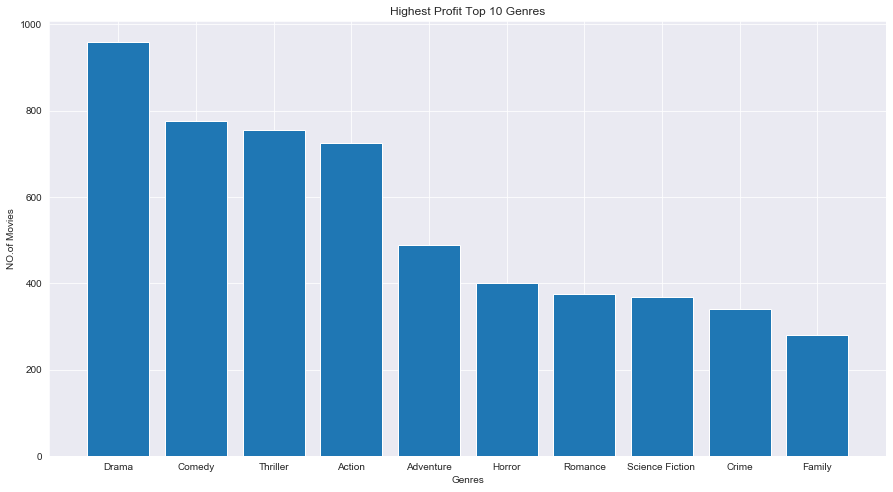

In [124]:
# Figure size
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')

genre_name = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Horror', 'Romance', 'Science Fiction ', 'Crime', 'Family']
#
plt.bar([1,2,3,4,5,6,7,8,9,10],t,tick_label = genre_name )
# Title
plt.title('Highest Profit Top 10 Genres')
# y-axis
plt.ylabel('NO.of Movies')
# x-axis
plt.xlabel('Genres');


<a id='q2'></a>
### Research Question 2  (What kinds of properties are associated with movies that have high Score?!)

> The data need accurate scale so I will add feature " Score " 

In [29]:
#compute the values of c and m to filter the movies
c=df['vote_average'].mean()
m=df['vote_count'].quantile(0.8)

# only consider movies that have higher than m vote_count . save this in a new data frame"score_df"  
score_df=df.copy().loc[df.vote_count >= m]

#calculate score using the IMDB formula
score_df['score']=score_df.apply(lambda x:(x['vote_count']/(x['vote_count']+m)* x['vote_average'])
                                + (m/(m+x['vote_count'])*c),axis=1)

# sort movies in descending order of their scores
score_df.sort_values(by='score',ascending=False)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
4177,7.192039,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,36777789,41693462,4915673,8.316969
7268,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175.0,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,31287365,1277913732,1246626367,8.186369
2874,8.466668,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152.0,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,187365527,1014733032,827367505,8.049803
2408,8.947905,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139.0,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,82470329,132022892,49552563,8.029248
650,4.780419,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105.0,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3039600,12888912,9849312,8.023797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,0.422934,Sharknado,Ian Ziering|Tara Reid|Cassie Scerbo|John Heard...,Anthony C. Ferrante,86.0,TV Movie|Horror,The Asylum|Syfy|Southward Films,2013-07-11,312,3.9,2013,936033,115100887,114164854,4.720353
5235,2.604799,Batman & Robin,Arnold Schwarzenegger|George Clooney|Chris O'D...,Joel Schumacher,125.0,Action|Crime|Fantasy|Science Fiction,PolyGram Filmed Entertainment|Warner Bros.,1997-06-20,828,4.4,1997,169807540,323594923,153787383,4.711339
61,2.487042,Fantastic Four,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,Josh Trank,100.0,Action|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Marv Fi...,2015-08-05,1565,4.4,2015,110399952,154539320,44139368,4.581629
1696,0.322320,Dragonball Evolution,Justin Chatwin|Joon Park|Jamie Chung|Emmy Ross...,James Wong,85.0,Action|Adventure|Fantasy|Science Fiction|Thriller,Ingenious Film Partners|Twentieth Century Fox ...,2009-04-01,261,3.1,2009,101640043,115100887,13460844,4.361295


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a317a5710>,
      dtype=object)

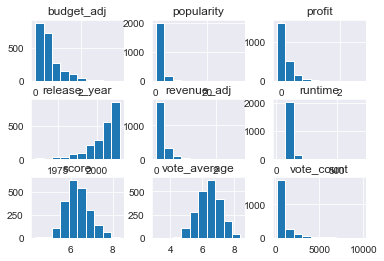

In [112]:
score_df.hist()

> lets check the MAXIMUM and the MINIMUM

In [144]:
# Get the id for MAXIMUM and the MINIMUM score
highest_score=score_df['score'].idxmax()
lowest_score=score_df['score'].idxmin()

# Get the details
highest_score_details = pd.DataFrame(score_df.loc[highest_score])
lowest_score_details = pd.DataFrame(score_df.loc[lowest_score])
# show and compaire 
display(highest_score_details)
display(lowest_score_details)

,4177
popularity,7.19204
original_title,The Shawshank Redemption
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...
director,Frank Darabont
runtime,142
genres,Drama|Crime
production_companies,Castle Rock Entertainment
release_date,1994-09-10
vote_count,5754
vote_average,8.4


,102
popularity,1.65108
original_title,The Boy Next Door
cast,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...
director,Rob Cohen
runtime,91
genres,Thriller
production_companies,Universal Pictures|Nuyorican Productions|Blumh...
release_date,2015-01-23
vote_count,810
vote_average,3.9


4177    The Shawshank Redemption
Name: original_title, dtype: object

>The results surprised me !\
the highest now not 9.2 as the previous describtion , now its 8.4 vote_average and 8.3 score: (* The Shawshank Redemption *)
>
>the lowest 3.9 vote_average and 4.3 score : (*The Boy Next Door*)
- Its clear the score attached with popularity
- The profits not much different only around 700 thousand dollers 

In [129]:
#The value that we will divide data Depending on it

score_df.score.mean()

6.32932172184161

In [32]:
# all the movies with score greater than the mean (6.3)
High_score=score_df.query('score > score.mean()')
High_score.sort_values(by='score',ascending=False)


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
4177,7.192039,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,36777789,41693462,4915673,8.316969
7268,5.738034,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175.0,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,31287365,1277913732,1246626367,8.186369
2874,8.466668,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152.0,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,187365527,1014733032,827367505,8.049803
2408,8.947905,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139.0,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,82470329,132022892,49552563,8.029248
650,4.780419,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105.0,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3039600,12888912,9849312,8.023797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10486,0.971594,Star Trek IV: The Voyage Home,William Shatner|Leonard Nimoy|DeForest Kelley|...,Leonard Nimoy,119.0,Science Fiction|Adventure,Paramount Pictures,1986-11-25,275,6.6,1986,47745753,264591052,216845299,6.333825
3435,1.241191,The Adjustment Bureau,Matt Damon|Emily Blunt|John Slattery|Anthony M...,George Nolfi,106.0,Thriller|Romance|Fantasy,Universal Pictures|Media Rights Capital|Gambit...,2011-03-03,1097,6.4,2011,48663781,123956325,75292544,6.333361
744,1.220073,'71,Jack O'Connell|Paul Anderson|Sean Harris|Sam R...,Yann Demange,99.0,Thriller|Action|Drama|War,Screen Yorkshire|British Film Institute (BFI)|...,2014-10-10,274,6.6,2014,36889069,1497553,-35391516,6.333269
3028,0.579470,Revolutionary Road,Leonardo DiCaprio|Kate Winslet|Michael Shannon...,Sam Mendes,119.0,Drama|Romance,DreamWorks SKG|Scott Rudin Productions|BBC Fil...,2008-12-19,430,6.5,2008,35447532,76187576,40740044,6.331076


> **High_score**  : new dataframe by filter to movies that made score  more than the mean value \
so now we can make or analysis on this specific data

In [49]:
High_score.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1.028000e+03,1.028000e+03,1.028000e+03,1028.000000
mean,2.206775,116.928988,1261.882296,7.041342,2002.126459,5.601267e+07,2.594305e+08,2.034178e+08,6.807799
std,2.268804,30.989740,1307.590677,0.414058,12.111843,5.190368e+07,3.227160e+08,2.952446e+08,0.391380
min,0.142486,3.000000,204.000000,6.400000,1960.000000,5.000000e+01,4.800000e+01,-1.185350e+08,6.329571
25%,1.044104,100.000000,429.250000,6.700000,1997.000000,2.026194e+07,6.182615e+07,3.310279e+07,6.493184
50%,1.577301,115.000000,747.500000,7.000000,2005.000000,3.688907e+07,1.333778e+08,9.553152e+07,6.709566
75%,2.610584,130.000000,1609.000000,7.300000,2012.000000,7.534988e+07,3.309649e+08,2.626620e+08,7.022218
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.155006e+08,2.827124e+09,2.750137e+09,8.316969


>the average revenue of the movies :260 million Dollars\
>the average runtime of the movies : around 2 Hours\
>the average profit of the movies :200 million Dollars\
>the average popularity of the movies :2 million


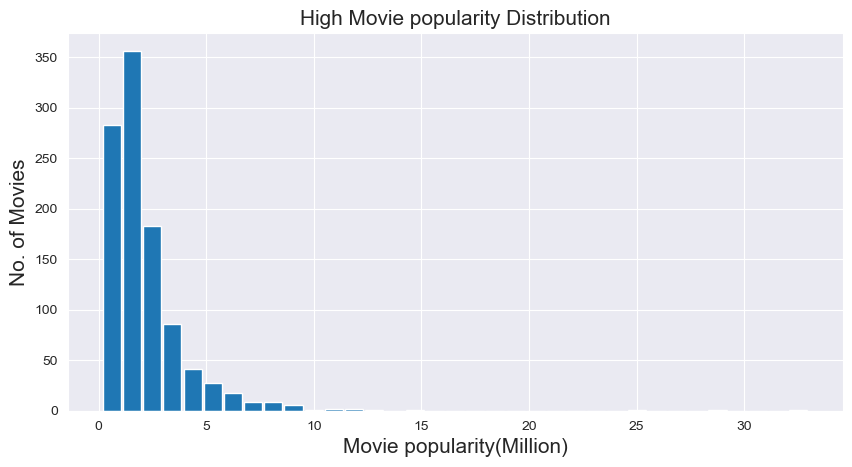

In [82]:

plt.figure(figsize=(10,5), dpi = 100)

# x-axis 
plt.xlabel('Movie popularity(Million)', fontsize = 15)
# y-axis 
plt.ylabel('No. of Movies', fontsize=15)
# distribution title
plt.title('High Movie popularity Distribution', fontsize=15)

# Plot the histogram
plt.hist(High_score['popularity'], rwidth = 0.9, bins =35)

# Displays the plot
plt.show()

> Visualization of the distribution of the score.

In [67]:
def extract_High_score_data(column):

    data = High_score[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

> create function to bring bake the cout values separately form string columns:\
cast , production companies , genres

#### High score movies casts ??

In [71]:
vote_cast = extract_High_score_data('cast')

# get top 10 casts

vote_cast.head(10)

Brad Pitt            25
Robert De Niro       21
Tom Hanks            19
Johnny Depp          18
Leonardo DiCaprio    17
Denzel Washington    16
Matt Damon           15
Tom Cruise           15
Samuel L. Jackson    14
Al Pacino            14
Ralph Fiennes        14
Robin Williams       13
Bruce Willis         13
Christian Bale       13
Woody Harrelson      12
dtype: int64

>surprisingly, there is a swap from this high profit movies listing with the high score movie listing.\
Based on the result above Brad Pitt  have the most high score movies with 25 movies followed by Robert De Niro with 21 movies and have the same rank in high profit movies listing.\
As for female actress Nothing!!.\
Seems like there are more high score movies actors than actress as out of the 10 cast from the above list there are no one female.

#### High score movies director ??

In [73]:
# get top 10 directors
score_director = extract_High_score_data('director')
score_director.head(10)

Steven Spielberg     20
Tim Burton           12
Martin Scorsese      11
Robert Zemeckis      10
Quentin Tarantino    10
Clint Eastwood        9
Ridley Scott          9
David Fincher         8
Christopher Nolan     8
Peter Jackson         8
dtype: int64

>As we see here Steven Spielberg have the largest number of high score movies with 20 movies
who have the the largest number of high profit movies too ,followed by Tim Burton With 12 movies .\
*There is a difference here between high score movies directors listing and high profit movies directors listing.

#### High score movies genres ??

In [74]:
# get top 10 genres
score_genres = extract_High_score_data('genres')
score_genres.head(10)

Drama              555
Thriller           293
Comedy             279
Action             264
Adventure          239
Crime              182
Romance            168
Science Fiction    158
Family             146
Fantasy            128
dtype: int64

>Based on the above result, Drame (555 movies) And swap between Thriller (293 movies) and Comedy in high score movies genres and high profit movies genres. Comedy came in third place in the list with 279 movies followed by Action genre with 264 movies.





#### High score movies production companies ??

In [75]:
# get top 10 production_companies
score_production_companies = extract_High_score_data('production_companies')
score_production_companies.head(10)

Warner Bros.                              121
Universal Pictures                         85
Paramount Pictures                         73
Twentieth Century Fox Film Corporation     55
Walt Disney Pictures                       51
Columbia Pictures                          45
New Line Cinema                            37
Touchstone Pictures                        33
DreamWorks SKG                             31
Amblin Entertainment                       29
dtype: int64

>Based on the above result, there is small difference between high score movies production company listing and high profit movies production company listing.\
Warner Bros has the largest number of high score movies with 121 movies followed by Universal Pictures with 85 movies which has the largest number of high profit movies and Paramount Pictures has the same rank in two lists.


Text(0, 0.5, 'runtime by Hours')

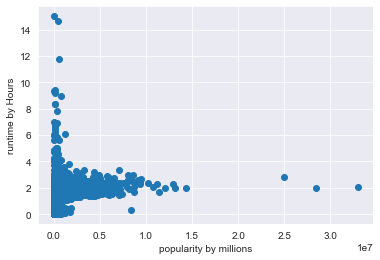

In [126]:
#what is the relation between the run time and popularity
#dose the people like to watch the long movies more? 

plt.scatter(df['popularity']*1000000,df['runtime']/60)
plt.xlabel('popularity by millions')
plt.ylabel('runtime by Hours')

>It's seemes that 2 houres is the most common runtime.

<a id='conclusions'></a>
## Conclusions



>My goal of this data analysis is to answer the 2 main questions 
>
**Question 1 ( What kinds of properties are associated with movies that have high profits(profits above the mean ("78211818.19530603")?!\
Question 2 (What kinds of properties are associated with movies that have high Score (scores above the mean "6.3")?!**\
After the above analysis, I can conclude the following:
>

In [199]:
High_profit.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2.421000e+03,2.421000e+03,2.421000e+03
mean,1.223623,107.457700,592.786452,6.053697,2000.266006,4.080258e+07,2.319849e+08,1.911823e+08
std,1.753380,26.735167,1046.769596,0.966561,13.196586,4.976538e+07,2.326270e+08,2.050917e+08
min,0.001349,4.000000,10.000000,1.500000,1960.000000,0.000000e+00,8.361457e+07,7.822307e+07
25%,0.318495,92.000000,26.000000,5.500000,1993.000000,6.098402e+06,1.151009e+08,1.045842e+08
50%,0.658866,102.000000,139.000000,6.100000,2004.000000,2.180000e+07,1.151009e+08,1.136462e+08
75%,1.525009,119.000000,677.000000,6.700000,2011.000000,5.689693e+07,2.530897e+08,1.844223e+08
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09



>Properties and attributes of the movies have a High profits :
>
>Average popularity of the movie 1.2236 million people.\
Average Budget must be around 40 Million Dollars\
Average revenue must be around 231 Million Dollars\
Year that makes the most profit: 2013.\
Actors to cast: Tom Cruise, Robert De Niro,Bruce Willis.\
Any one of these should be the director: Steven Spielberg, Woody Allen, Robert Zemeckis, Ron Howard.\
Popular production companies for high profit movies: Universal Pictures, Warner Bros, Paramount Pictures.\
Genre must any of these: Drama, Comedy, Thriller.



In [198]:
High_score.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1.028000e+03,1.028000e+03,1.028000e+03,1028.000000
mean,2.206775,116.928988,1261.882296,7.041342,2002.126459,5.601267e+07,2.594305e+08,2.034178e+08,6.807799
std,2.268804,30.989740,1307.590677,0.414058,12.111843,5.190368e+07,3.227160e+08,2.952446e+08,0.391380
min,0.142486,3.000000,204.000000,6.400000,1960.000000,5.000000e+01,4.800000e+01,-1.185350e+08,6.329571
25%,1.044104,100.000000,429.250000,6.700000,1997.000000,2.026194e+07,6.182615e+07,3.310279e+07,6.493184
50%,1.577301,115.000000,747.500000,7.000000,2005.000000,3.688907e+07,1.333778e+08,9.553152e+07,6.709566
75%,2.610584,130.000000,1609.000000,7.300000,2012.000000,7.534988e+07,3.309649e+08,2.626620e+08,7.022218
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.155006e+08,2.827124e+09,2.750137e+09,8.316969


>For a movies to have a high score :

>Average popularity of the movie 1.028 million people.
Average Budget must be around 56 Million Dollars.
Average revenue must be around 259 Million Dollars.
Actors to cast: Brad Pitt,Robert De Niro, Tom Hanks.
Any one of these should be the director: Steven Spielberg, Tim Burton, Martin Scorsese .
Produce by any of these production companies:Warner Bros,Universal Pictures , Paramount Pictures .
Genre must any of these: Drama, Thriller , Comedy.



>By meeting the above criteria, the movie will have a higher probability to be a hit and earn an average revenue of around 282 million dollar and profit of at least 78 million dollars.



General Questions :



>. Which genres are most popular from year to year? 
 it was always drama then comedy 

>. Who is the actor/s with highest movie revenues?
 Tom Cruise, Robert De Niro,Bruce Willis.


>. Which company have the most movies productivity ?
Universal Pictures 522 movies 



>. Which genres are most popular from year to year?

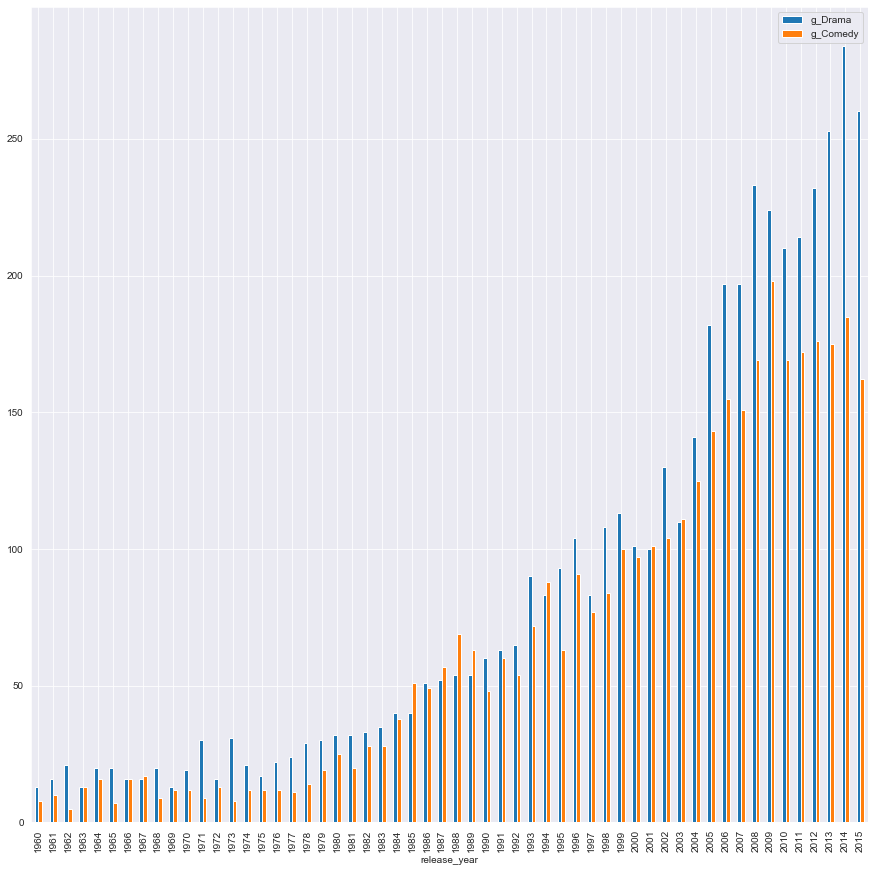

In [211]:
#. Which genres are most popular from year to year? 
x = df.set_index('release_year').genres.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('genres');
genres_popular=pd.get_dummies(x, prefix='g', columns=['genres']).groupby(level=0).sum()

#Get row index label of Maximum value in every column
maxValue= genres_popular.idxmax(axis=1)
maxValue
j=maxValue.drop_duplicates()

#ploting

genres_popular.plot(kind='bar', y=j ,figsize=(15,15))


> . Which company have the most movies productivity ?

In [212]:
def High_prodecution(column):

    data = df[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count



High_prodecution('production_companies')

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
FM Productions                              1
Seon Film Productions                       1
Broadview Pictures                          1
Celluloid Dreams Productions                1
Innocence Productions                       1
Length: 7879, dtype: int64